Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In [1]:
## Polynomial functions are a type of mathematical function that involves adding or multiplying variables raised to various powers.
## In machine learning, polynomial functions are often used as feature transforms to convert the original data into a higher-dimensional space,
## where it may be easier to separate different classes of data.

In [2]:
## On the other hand, kernel functions are used to compute the similarity between pairs of data points in a given space. The idea is to transform the original data 
## into a higher-dimensional space and then define a similarity function based on the dot product of the transformed data points. 

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [3]:
## first import svm.svc classifier then 
##create svm lassifier object with kernel as polynomial and define degree of polynomial
## Train this on training data
## then predict and evaluate performance

from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=3)

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In [4]:
## In support vector regression (SVR), epsilon is a hyperparameter that controls the width of the margin around the regression line. 

In [5]:
## Increasing the value of epsilon in SVR can have an impact on the number of support vectors used to construct the regression line.

In [6]:
## 1.The width of the margin around the regression line increases. This means that more points can fall within the margin 
##      without violating the epsilon-insensitive loss function, which is used to identify support vectors.
## 2.The number of support vectors used to construct the regression line may decrease. 
#        This is because points that are further away from the regression line may not be considered support vectors if they fall within the expanded margin.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

In [7]:
## Kernel Function:
## The kernel function is a key parameter in SVR, and it determines the mapping of the input data into a high-dimensional feature space 
## where the SVR algorithm can find a linear regression line

In [8]:
## C parameter:
## The C parameter in SVR determines the trade-off between model complexity and the degree of error allowed.
## A higher C value means a more complex model and a lower tolerance for errors.
## Conversely, a lower C value means a simpler model with a higher tolerance for errors.

In [9]:
## Epsilon parameter:
## The epsilon parameter in SVR sets the width of the margin around the regression line within which no penalty is given for errors.
## This parameter controls the sensitivity of the model to errors in the training data

In [10]:
## Gamma parameter:
## The gamma parameter in SVR determines the width of the RBF kernel
##  A higher gamma value means that the influence of each data point is limited to a smaller area around the point. 
## Conversely, a lower gamma value means that the influence of each data point is more spread out, resulting in a more complex model.

In [11]:
## In general, the choice of kernel function, C parameter, epsilon parameter, and gamma parameter depends on the specific problem and the nature of the data. 
## For example, in a problem with noisy data, it may be necessary to increase the value of the epsilon parameter to allow for greater error tolerance
## In a problem with a large number of features, a linear kernel may be a better choice than a polynomial kernel to avoid overfitting. 
## Additionally, the gamma parameter should be tuned based on the scale of the input data. 
## A higher gamma value may be suitable for data with a small number of samples or if the features have a high degree of correlation.

Q.5 Load,split,Implement SVC and perform eda,hyperparameter tuning,evaluate performance etc.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
titanic=sns.load_dataset('titanic')

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Cleaning and Preprocessing

In [15]:
titanic.shape

(891, 15)

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic.isnull().sum()/len(titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [19]:
## since deck has large number of null values we can remove this feature

In [20]:
titanic=titanic.drop('deck',axis=1)

In [21]:
## age column has some missing values we can fill this with either mean/median

<AxesSubplot: xlabel='age', ylabel='Count'>

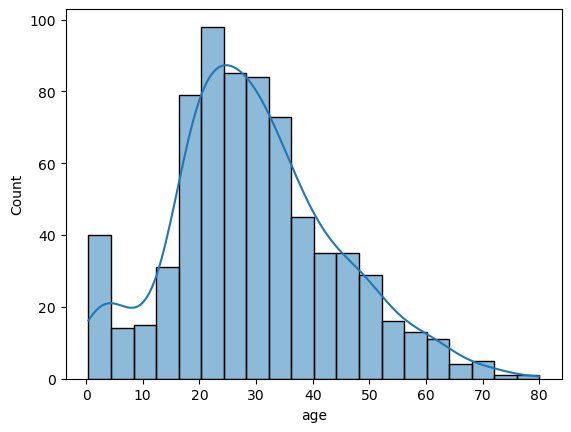

In [22]:
sns.histplot(titanic['age'],kde=True)

In [23]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())

In [24]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [25]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [26]:
df=titanic.copy()

In [27]:
df['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

### Feature Engineering

In [28]:
## Converting some categories with 2 unique values to binary

In [29]:
df['sex']=df['sex'].map({'male':1,'female':0})

In [30]:
df['adult_male']=df['adult_male'].map({True:1,False:0})

In [31]:
df['alone']=df['alone'].map({True:1,False:0})

In [32]:
df['alive']=df['alive'].map({'yes':1,'no':0})

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,Southampton,0,1


In [34]:
## Converting remaining categories to one_hot_encoding

In [35]:
df_cat=df.select_dtypes(include=['O','category'])

In [36]:
df_num=df.select_dtypes(exclude=['O','category'])

In [37]:
df_cat.head()

,embarked,class,who,embark_town
0,S,Third,man,Southampton
1,C,First,woman,Cherbourg
2,S,Third,woman,Southampton
3,S,First,woman,Southampton
4,S,Third,man,Southampton


In [38]:
df_num.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,0,1


In [39]:
df_cat_dummy=pd.get_dummies(df_cat)

In [40]:
df_cat_dummy.head()

,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,1,0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,0,1


In [41]:
## Scaling of Numerial feature

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()

In [44]:
num_scaled=scaler.fit_transform(df_num)

In [45]:
df_scaled=pd.DataFrame(data=num_scaled,index=df_num.index,columns=df_num.columns)

In [46]:
df_scaled.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,0.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0,0.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


## Preparaion of Final DF

In [47]:
df_final=pd.concat([df_cat_dummy,df_scaled],axis=1)

In [48]:
df_final.head()

,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,...,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
0,0,0,1,0,0,1,0,1,0,0,...,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,0.0
1,1,0,0,1,0,0,0,0,1,1,...,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0
2,0,0,1,0,0,1,0,0,1,0,...,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,1.0,1.0
3,0,0,1,1,0,0,0,0,1,0,...,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0,0.0
4,0,0,1,0,0,1,0,1,0,0,...,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


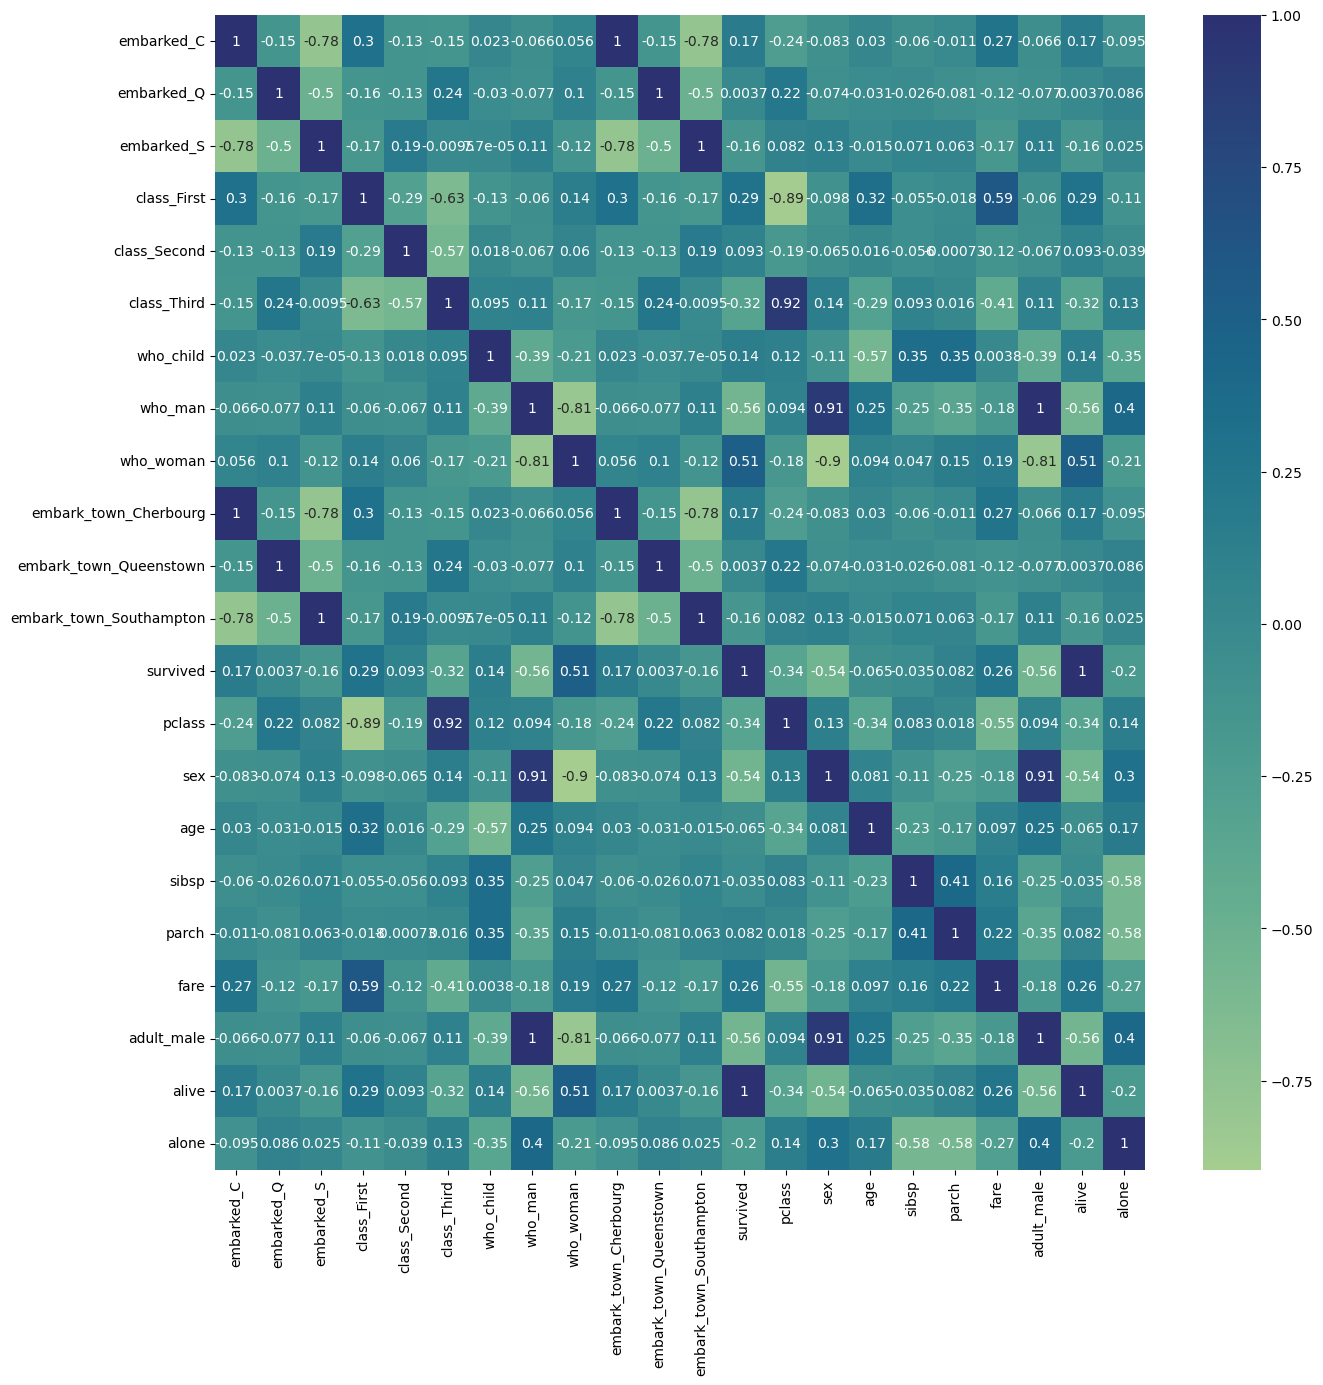

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.corr(),annot=True,cmap='crest')
plt.show()

In [50]:
df_final.columns

Index(['embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'survived', 'pclass', 'sex', 'age', 'sibsp',
       'parch', 'fare', 'adult_male', 'alive', 'alone'],
      dtype='object')

In [51]:
## WE can drop some features as they are same but with different names in dataset

In [52]:
df_final=df_final.drop(['embarked_C','embarked_Q','embarked_S','alive','adult_male'],axis=1)

## Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
X=df_final.drop('survived',axis=1)
y=df_final['survived']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=21)

In [57]:
svm_model=SVC()

In [58]:
svm_model.fit(x_train,y_train)

SVC()

In [59]:
y_pred=svm_model.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.8100558659217877

Confusion Matrix 
 [[99  6]
 [28 46]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       105
         1.0       0.88      0.62      0.73        74

    accuracy                           0.81       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.81      0.80       179



### Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [61]:
parameter={'C':[.5,1,5,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3],'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}

In [62]:
grid_param=GridSearchCV(estimator=svc,param_grid=parameter,scoring='accuracy',cv=5)

In [63]:
grid_param.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.5, 1, 5, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [64]:
grid_param.best_params_

{'C': 10,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly'}

In [65]:
grid_param.best_score_

0.8342755835713582

In [66]:
random_param=RandomizedSearchCV(estimator=svc,param_distributions=parameter,cv=10)

In [67]:
random_param.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(kernel='poly'),
                   param_distributions={'C': [0.5, 1, 5, 10],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [2, 3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [68]:
random_param.best_params_

{'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 2,
 'decision_function_shape': 'ovo',
 'C': 5}

In [69]:
random_param.best_score_

0.8286776212832552

In [70]:
### Creating object with grid search parameter

In [71]:
svm_model=SVC(kernel='poly',gamma ='scale',degree = 2,decision_function_shape = 'ovo',C=10)

In [72]:
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report\n",classification_report(y_test,y_pred))

Accuracy Score: 0.8156424581005587

Confusion Matrix 
 [[101   4]
 [ 29  45]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       105
         1.0       0.92      0.61      0.73        74

    accuracy                           0.82       179
   macro avg       0.85      0.79      0.80       179
weighted avg       0.84      0.82      0.81       179



In [73]:
## Saving our model 

In [74]:
import pickle

In [75]:
pickle.dump(svm_model,open("SVM_Model.pkl","wb"))

In [76]:
pickle.dump(scaler,open("scaler.pkl",'wb'))